# Natural Language Processing - Bag of Words (BoW)

## Example
An email example is analyzed to demonstrate how BoW can be applied to real-life text data.

The email says:

> Hello Kirill,
>
> Checking if you are back to Oz. Let me know if you are around and keen to sync on how things are going. I defo could use some of your creative thinking to help with mine :)
>
> Cheers,
>
> V


## Understanding the Bag of Words Model
- **Vector Representation:**
  - A BoW model represents text as a vector of fixed length (e.g., 20,000 elements), where each element corresponds to a specific word from a predefined vocabulary.
  - Most English speakers use around 3,000 words regularly, but the model uses 20,000 to cover a broader range, assigning:
    - SOS: Start of Sentence
    - EOS: End of Sentence
    - Special Words: for any unknown or rare words
- **Sparse Vectors:**
  - The resulting vectors are typically sparse, meaning most elements are zeros with a few positions indicating word counts from the text.
  

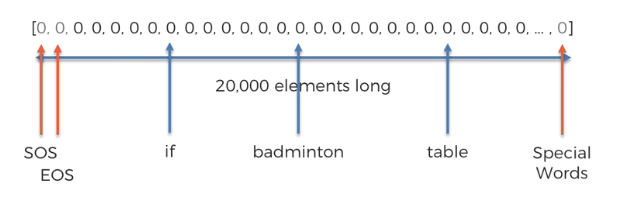


## Processing the Email Example
- **Vector Construction:**
  - Each word in the email is mapped to its corresponding position in the 20,000-element vector.
  - Words not in the predefined vocabulary (e.g., names like "Cyril" or "Vee") are grouped into a special category.
- **Goal**: our goal is to come up with a reply, "yes" or "no", to this email. To do this, we will train our model with other data for which we already have “Yes” and “No” answers. The training data/words will also be converted to vectors so that they can be processed.


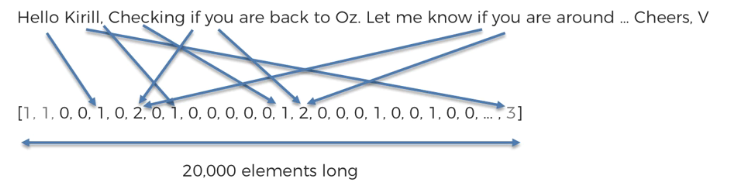


## Model Training and Prediction
- **Training Data:**
  - The model is trained using a collection of past emails and their yes/no responses.
  - Each email is converted into a BoW vector, paired with its corresponding response.
- **Algorithms Used:**
  - **Logistic Regression:** Applied to classify emails into yes or no responses based on the BoW vectors.
  - **Neural Networks:** An alternative approach where the BoW vectors serve as input to a neural network, which learns to predict responses through training.
- **Prediction Process:**
  - Once trained, the model can take a new email's BoW vector and predict an appropriate yes or no response.


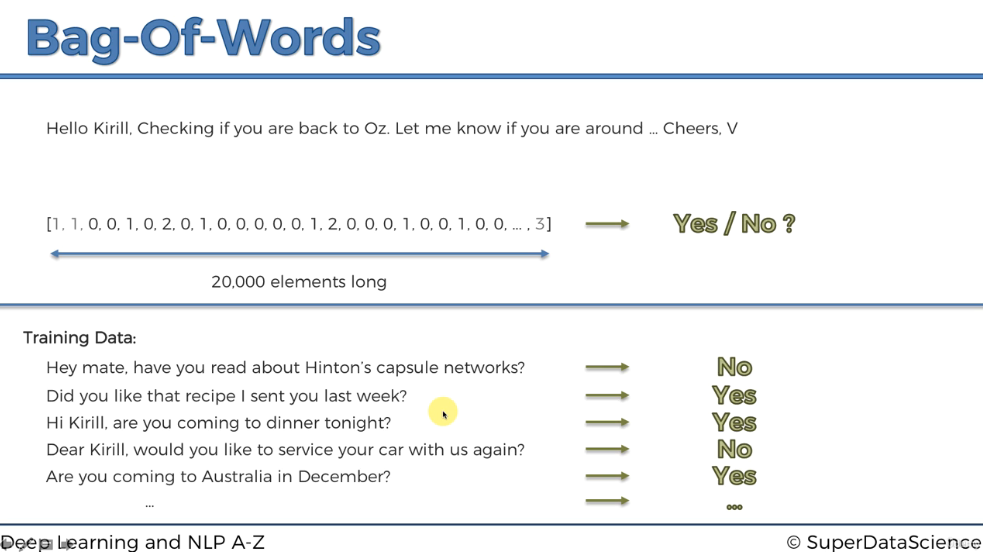


## Key Takeaways
- **Limitation: Simplicity of Responses:** The BoW model, especially when used with simple classifiers, is limited to binary responses and lacks the ability to generate nuanced or conversational replies.
- **BoW as a Fundamental NLP Technique:**  Despite its simplicity, the Bag of Words model is a foundational method for text representation in NLP.
- **Scalability and Practicality:**  Using a fixed-size vocabulary allows for scalable processing of text data, though it requires handling unknown words effectively.
- **Integration with Machine Learning Models:**  BoW vectors can be effectively utilized with various machine learning algorithms to perform tasks like classification and prediction.



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

- **Dataset**: 1000 restaurant reviews.
- **Goal**: sentiment analysis to classify them as positive or negative.
- **Format**: Tab-Separated Values (TSV) with two columns:
  - Review Text: Example entries include "Wow, love this place." and "Crust is not good."
  - Label: Binary classification where `1` indicates a positive review and `0` indicates a negative review.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 7 - Natural Language Processing/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

`quoting = 3` instructs the CSV parser not to treat any characters as quote characters, ensuring that all quotes in the data are read as literal characters.

## Cleaning the texts

This code processes text data by cleaning and stemming it, removing stopwords, and creating a cleaned version of the text in a list called `corpus`:

In [4]:
import re  # Importing regular expressions to clean the text
import nltk  # Importing nltk for natural language processing

# Downloading the stopwords (commonly used words in a language) from nltk
nltk.download('stopwords')

# Importing stopwords list and PorterStemmer from nltk for text cleaning and stemming
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []  # Initializing an empty list to hold the cleaned text (corpus)

# Looping through each review in the dataset (assuming 1000 reviews)
for i in range(0, 1000):
  # Removing all characters that are not alphabets (not letters a-z, A-Z, e.g. punctuation symbols) and replacing them with a space
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])

  # Converting the review to lowercase
  review = review.lower()

  # Splitting the review into individual words (tokenization)
  review = review.split()

  # Initializing the PorterStemmer for stemming (reducing words to their root form)
  ps = PorterStemmer()

  # Getting the list of stopwords (common words to be removed) in English
  all_stopwords = stopwords.words('english')

  # Removing the word 'not' from the stopwords list, as it can impact sentiment
  all_stopwords.remove('not')

  # Stemming the words and removing stopwords (words not in stopwords list) using a list comprehension
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]

  # Joining the cleaned and stemmed words back into a single string
  review = ' '.join(review)

  # Adding the cleaned review to the corpus
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [6]:
# Importing CountVectorizer to convert text into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Creating an instance of CountVectorizer with a maximum of 1500 features (most frequent words)
cv = CountVectorizer(max_features = 1500)

# Applying the CountVectorizer to the text corpus (bag-of-words model) and converting the result into a numpy array
X = cv.fit_transform(corpus).toarray()

# Extracting the target variable (dependent variable) from the dataset; assuming it's the last column
y = dataset.iloc[:, -1].values

The choice of 1500 features is a way to balance between model complexity, performance, and computational efficiency while retaining the most important words for the task. You can adjust this number based on the size of your dataset and the complexity of the task.

In [7]:
print(X[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(y)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

# X: features (bag-of-words matrix), y: target (labels)
# test_size = 0.20 means 20% of the dataset will be used for testing, and 80% will be used for training
# random_state = 0 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

The choice of the Naive Bayes algorithm is based on the course instructor experience, due to its effectiveness in natural language processing tasks. However, other classification models can be tested as well, and some of them might achieve a higher accuracy than the score obtained during this implementation.

In [10]:
from sklearn.naive_bayes import GaussianNB

# Creating an instance of the Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Fitting the classifier to the training data (X_train) and the corresponding labels (y_train)
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [11]:
# Using the trained classifier to make predictions on the test data (X_test)
y_pred = classifier.predict(X_test)

# Concatenating the predicted labels (y_pred) and the actual labels (y_test) into a single array for comparison
# Reshaping both arrays to have a single column for concatenation
# Printing the concatenated array
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generating the confusion matrix: it compares the actual labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Calculating and returning the accuracy score of the model: it measures the proportion of correctly predicted labels to the total predictions
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

1. **Confusion Matrix**:
   - **True Negatives (TN)**: 55 (correctly predicted negative reviews)
   - **False Positives (FP)**: 42 (incorrectly predicted as positive when they are actually negative)
   - **False Negatives (FN)**: 12 (incorrectly predicted as negative when they are actually positive)
   - **True Positives (TP)**: 91 (correctly predicted positive reviews)

2. **Accuracy Score**:
   - **0.73 (or 73%)**: This indicates that the model correctly predicted 73% of the reviews in the test set.

Overall, the confusion matrix shows the model's performance in distinguishing between positive and negative reviews, while the accuracy score provides a summary metric of the model's effectiveness.

## Predicting if a single review is positive or negative

### Positive review

Use our model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [17]:
new_review = 'I love this restaurant so much'

# Cleaning the text
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
print(new_corpus) # cleaned text

# Creating the Bag of Words model
new_X_test = cv.transform(new_corpus).toarray()
print(new_X_test)

# Predicting the Test set results
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

['love restaur much']
[[0 0 0 ... 0 0 0]]
[1]


The review was correctly predicted as positive by our model.

### Negative review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [18]:
new_review = 'I hate this restaurant so much'

# Cleaning the text
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
print(new_corpus)

# Creating the Bag of Words model
new_X_test = cv.transform(new_corpus).toarray()
print(new_X_test)

# Predicting the Test set results
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

['hate restaur much']
[[0 0 0 ... 0 0 0]]
[0]


The review was correctly predicted as negative by our model.

## Future Lines

A valuable extension of this work would be to explore additional classification models beyond Naive Bayes covered in the current notebook. Testing all the classification models introduced in Part 3 would provide a comparison across different approaches, ensuring that the chosen model optimizes for the specific problem context. By evaluating each model’s performance, there may be opportunities to surpass the current results.

**Model Evaluation Metrics:**

For each model tested, we must make an evaluation based on various metrics, not just Accuracy. Other metrics to be considered are:
- **Precision**: measuring exactness
- **Recall**: measuring completeness
- **F1 Score**: balancing Precision and Recall

**Exploration of Additional Models:**

Expanding the exploration to models not yet covered in Part 3, such as **CART**, **C5.0**, and **Maximum Entropy**, could provide new insights as well, especially in specialized areas like NLP. These models might offer better results depending on the dataset and the problem requirements.


## Bonus: formulas for the various performance metrics

- **TP** = True Positives  
- **TN** = True Negatives  
- **FP** = False Positives  
- **FN** = False Negatives

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

$$
\text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$